## Analisis de Datos - Trabajo final integrador

Alumno: Luciano Peroni


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

Se proponen dos objetivos: 
1. Predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.

(NO APLICA) 2. Predecir el volúmen de precipitaciones (columna *Rainfall* ), en función de los datos meteorológicos restantes.***


### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funpymodeling as fp

In [37]:
pd.options.mode.chained_assignment = None

In [5]:
# Carga del dataset de directorio local
dataset = pd.read_csv('./weatherAUS.csv')

Analizamos las dimensiones del dataset

In [8]:
print('Total de filas : ',dataset.shape[0])
print('Total de columnas :',dataset.shape[1])

Total de filas :  145460
Total de columnas : 23


visualizamos las primeras 5 filas del dataset para darnos una idea de como esta estructurado a primera vista. Se visualizan columnas que contienen varios valores NaN.

In [6]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Analizamos los tipos de variables en el dataset. Las variables object son variables categoticas. Dentro de las variables float64 puede ocurrir que tengamos variables categoricas representadas numericamente. 

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Analisis estadistico de las variables numericas

In [9]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Analizamos los mismos datos con la libreria funpymodeling

In [31]:
status = fp.status(dataset)
status

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.000000,0,0.000000,3436,object
1,Location,0,0.000000,0,0.000000,49,object
2,MinTemp,1485,0.010209,159,0.001093,389,float64
3,MaxTemp,1261,0.008669,14,0.000096,505,float64
4,Rainfall,3261,0.022419,91080,0.626152,681,float64
5,Evaporation,62790,0.431665,244,0.001677,358,float64
6,Sunshine,69835,0.480098,2359,0.016218,145,float64
7,WindGustDir,10326,0.070989,0,0.000000,16,object
8,WindGustSpeed,10263,0.070555,0,0.000000,67,float64
9,WindDir9am,10566,0.072639,0,0.000000,16,object


Variables que contienen mayor porcentaje de NaNs

In [48]:
status.sort_values(by=['q_nan'], inplace=True, ascending=False)
status[['variable','q_nan','p_nan']].head()

,variable,q_nan,p_nan
6,Sunshine,69835,0.480098
5,Evaporation,62790,0.431665
18,Cloud3pm,59358,0.408071
17,Cloud9am,55888,0.384216
15,Pressure9am,15065,0.103568


Las variables ***Sunshine*** , ***Evaporation***, ***Cloud3pm*** y ***Cloud9am*** contienen mas del 40% de sus datos en NaN

Variables que contienen mayor porcentaje de ceros

In [47]:
status.sort_values(by=['q_zeros'], inplace=True, ascending=False)
status[['variable','q_zeros','p_zeros']].head()

,variable,q_zeros,p_zeros
4,Rainfall,91080,0.626152
11,WindSpeed9am,8745,0.060120
17,Cloud9am,8642,0.059412
18,Cloud3pm,4974,0.034195
6,Sunshine,2359,0.016218


En la variable ***Rainfall*** se visualiza que mas del 60% de sus datos son nulos 

Mediante el analisis exploratorio de los datos podemos indentificar el tipo de variables:

***Variable de Salida :***
- RainTomorrow

***Variables Categoricas:***
- Location
- WindGustDir
- WindDir9am
- WindDir3pm
- RainToday

***Variables Numericas:***
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustSpeed	
- WindSpeed9am	
- WindSpeed3pm	
- Pressure9am	
- Pressure3pm
- Temp9am
- Temp3pm


- Cloud3pm 
- Cloud9am
- Humidity9am
- Humidity3pm

***Otras variables:***
- date

Algunas variables como ***Cloud9am*** y ***Cloud3pm*** pueden considerarse categoricas segun el significado de los valores discretos que contiene dicha variable. Para este trabajo fueron tomadas como numericas.  

### Analizamos primero la variable de salida

In [49]:
print('Cantidad de clases de salida: ',dataset['RainTomorrow'].nunique())

Cantidad de clases de salida:  2


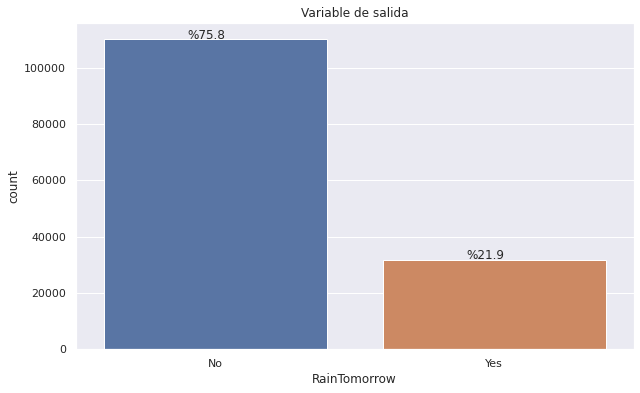

In [72]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= dataset['RainTomorrow'], data=dataset)
ax.set_title('Variable de salida')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format((p.get_bbox().get_points()[1,1]/dataset.shape[0])*100), (p.get_x()+0.3, p.get_height()+50))
plt.show()

La salida no esta balanceada, por tratarse de una variable categorica binaria, se puede codificar como 1 para casos positivos y con un 0 para casos negativos. 

### Analisis de variables categoricas

In [106]:
data_cat = dataset[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']]

In [104]:
def plotVariable(dataset, variable):
    plt.figure(figsize=(8,10))
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y= dataset[variable], data=dataset, palette = "Set2")
    ax.set_title('Variable : '+ variable)
    plt.show()

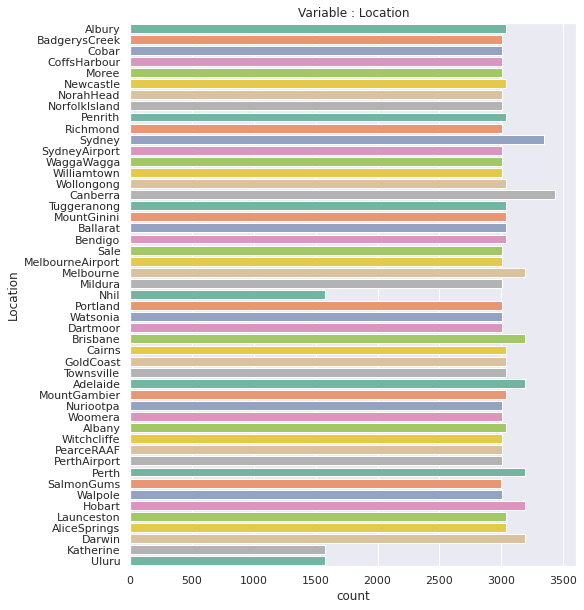

In [105]:
plotVariable(data_cat,'Location')

Se observa que la variable ***location*** esta bastante balanceada. Por otro lado, por la cantidad de clases quizas sea conveniente usar algun metodo de codificacion que no utilice tantas dimensiones. 

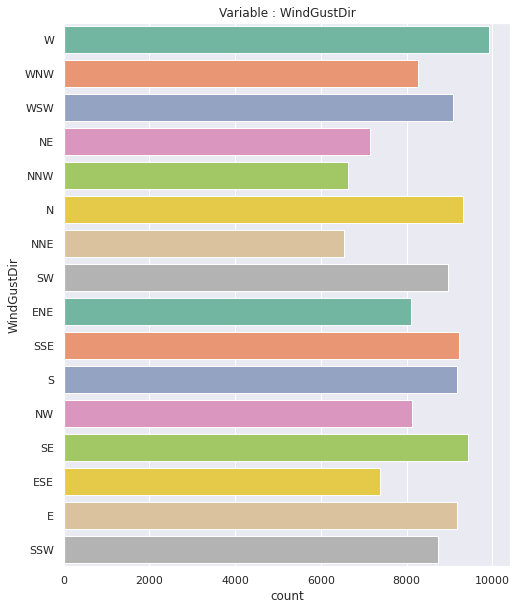

In [99]:
plotVariable(data_cat,'WindGustDir')

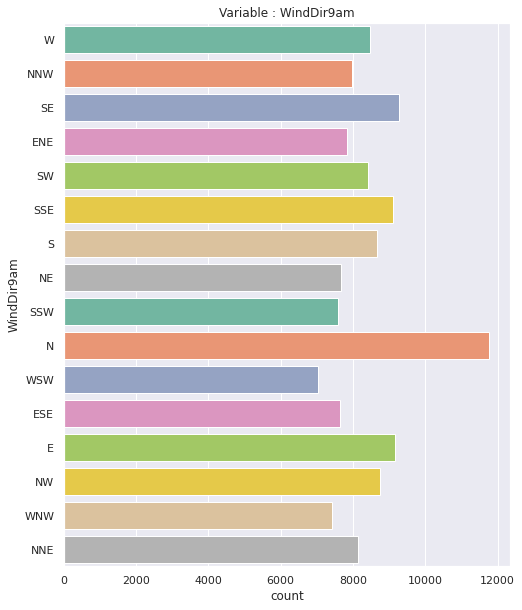

In [100]:
plotVariable(data_cat,'WindDir9am')

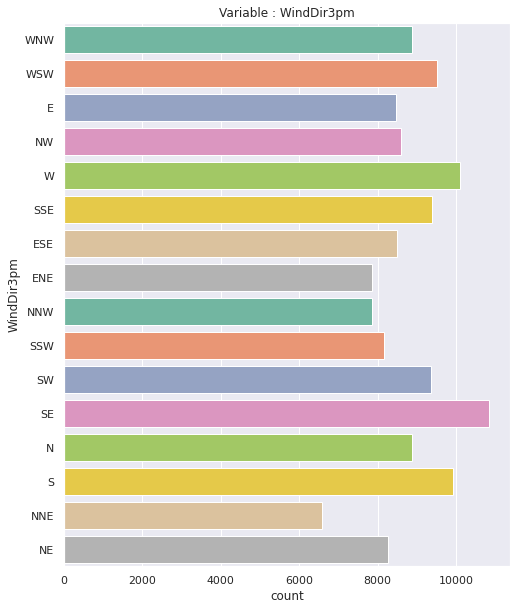

In [101]:
plotVariable(data_cat,'WindDir9am')

Las clases de las variables ***WindGustDir, WindDir9am, WindDir3pm*** respectivas al viento estan balanceadas. 

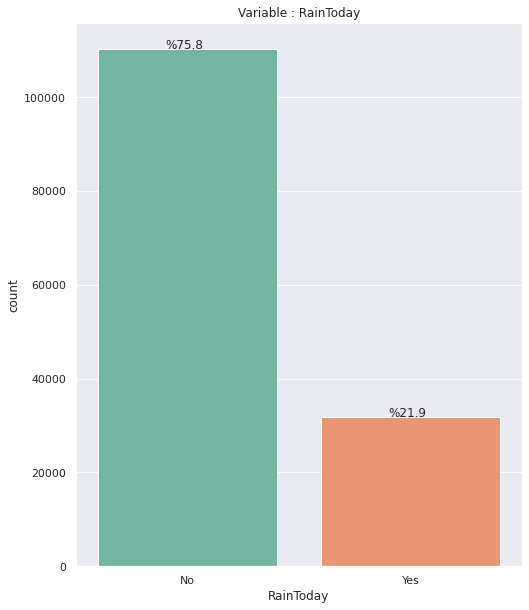

In [103]:
plt.figure(figsize=(8,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= dataset['RainToday'], data=dataset, palette = "Set2")
ax.set_title('Variable : RainToday')
for p in ax.patches:
    ax.annotate('%{:.1f}'.format((p.get_bbox().get_points()[1,1]/dataset.shape[0])*100), (p.get_x()+0.3, p.get_height()+50))
plt.show()

### Analisis de variables numericas

In [108]:
data_num = dataset[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                    'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
                    'Temp9am','Temp3pm']]

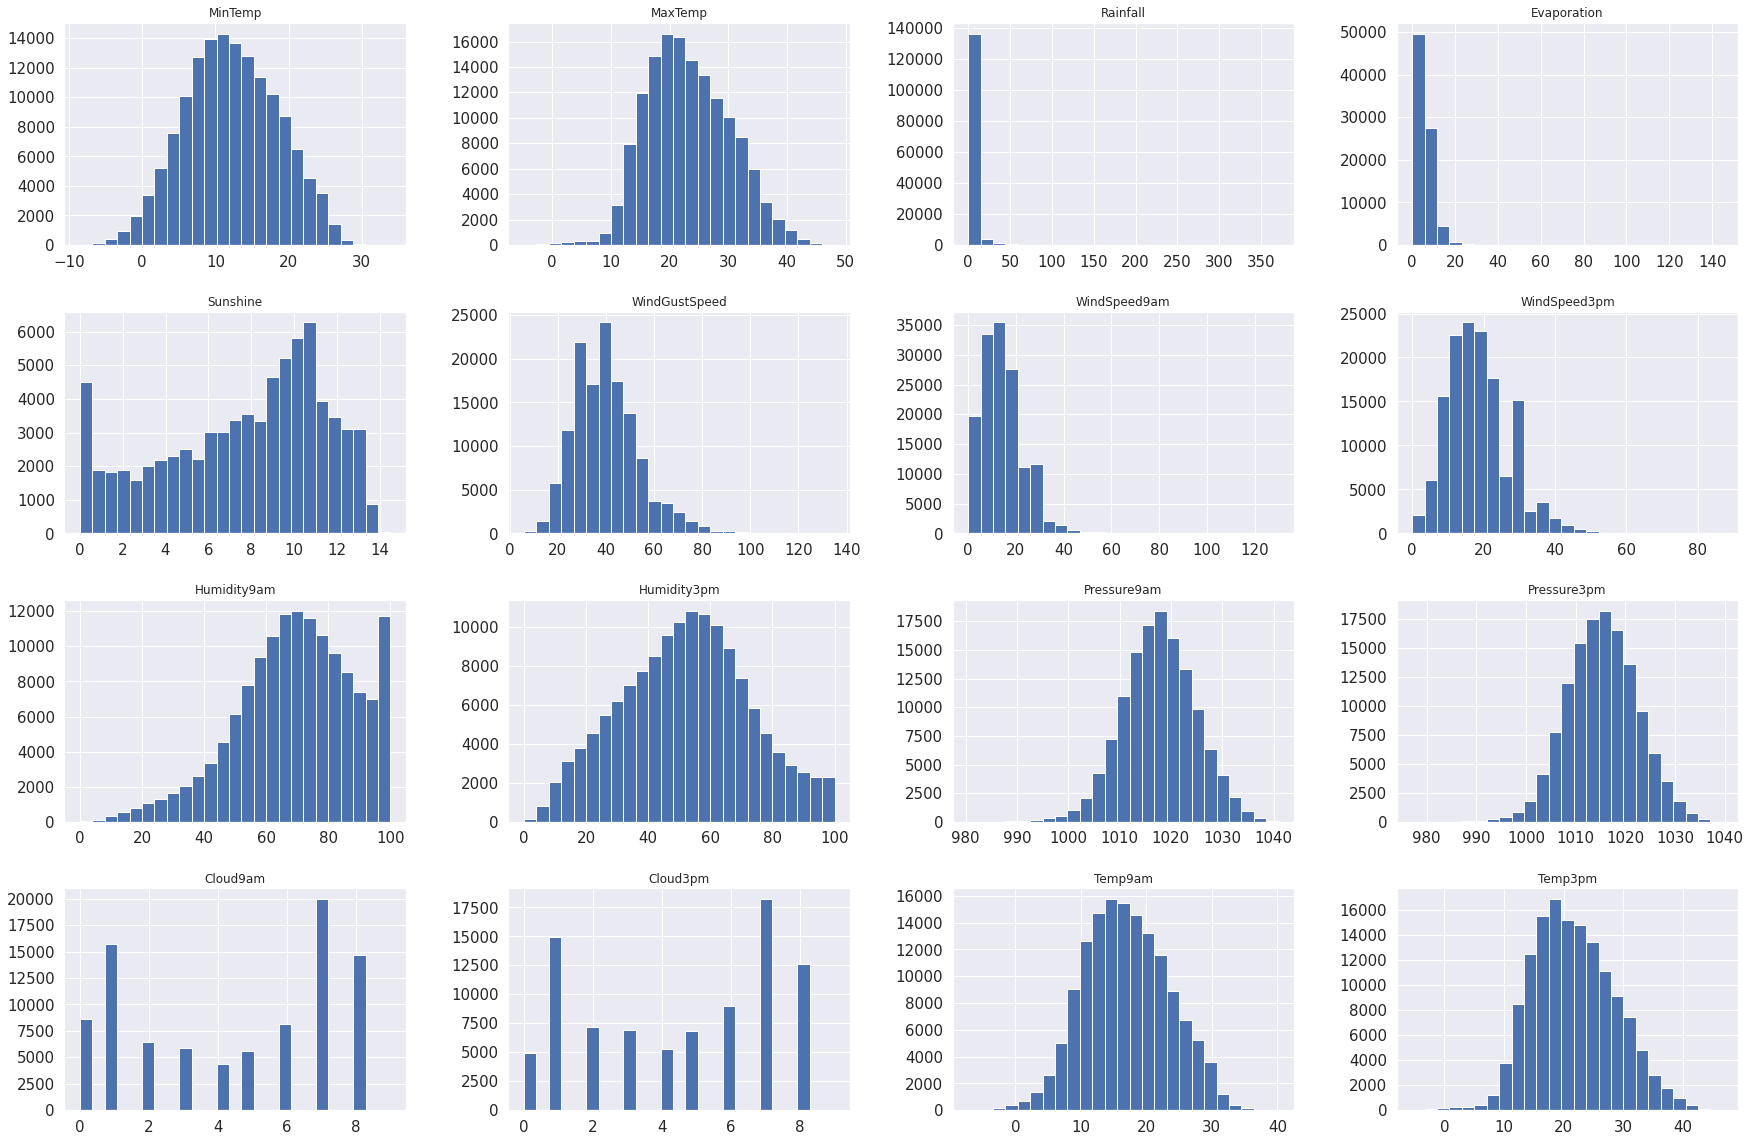

In [116]:
data_num_fig = data_num.hist(bins=25 ,xlabelsize=15, ylabelsize=15,figsize=(30,20))


<AxesSubplot:>

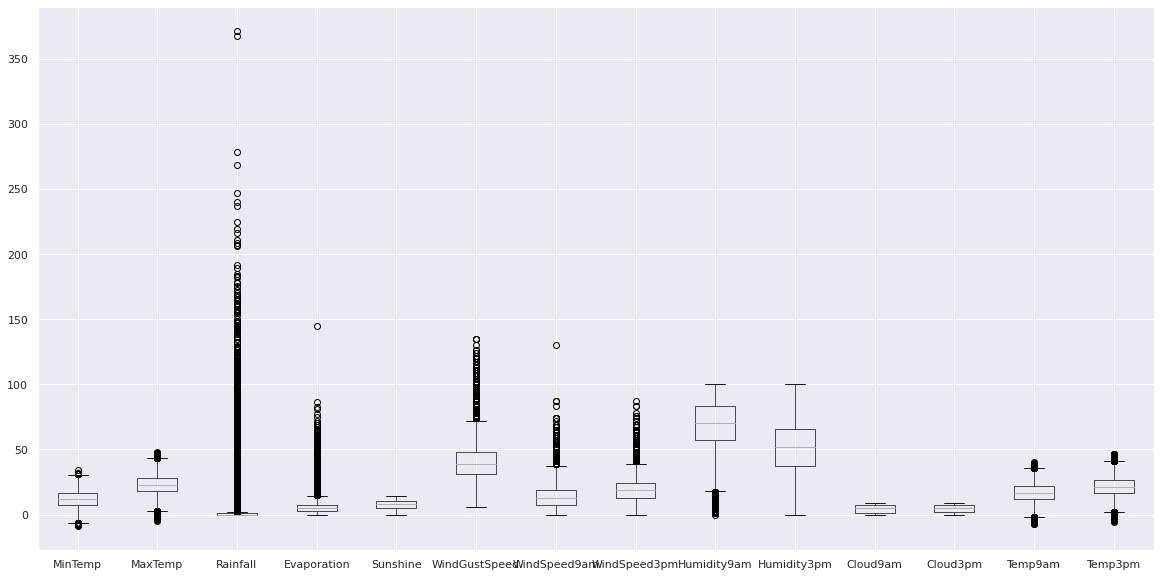

In [121]:
 dataset[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                    'WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']].boxplot(figsize=(20,10))

<AxesSubplot:>

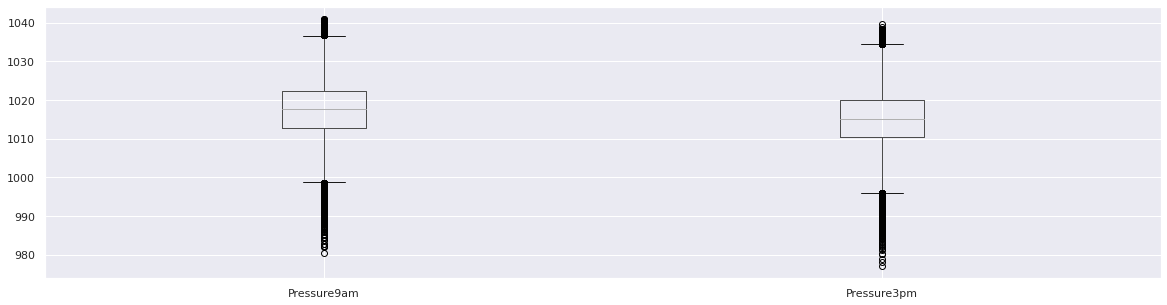

In [120]:
dataset[['Pressure9am','Pressure3pm']].boxplot(figsize=(20,5))

La variable ***Rainfall*** contiene mas del 60% de sus valores en cero, la variable ***Evaporation*** contiene un 43% de valores NaN , y muchos valores cercanos a cero y al igual que ***Rainfall*** no siguen una distribucion normal.

Las variables ***MinTemp, MaxTemp, Pressure9am, Pressure3pm,Temp9am y Temp3pm*** sigen distribuciones normales, con pocos valores outliers para el caso de las temperaturas. 

Las variables relativas al viento ***WindGustSpeed, WindSpeed9am, WindSpeed3pm*** tienen distribuciones sesgadas con outliers en un solo sentido. 

Las variables ***Cloud9am , Cloud3pm*** Siguen distribuciones que tienden a ser uniformes, contienen valores discretos para representar nubosidad. 

### Analisis de otras variables : Date

In [128]:
dataset['Date'].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [126]:
Date = pd.DatetimeIndex(dataset['Date'])

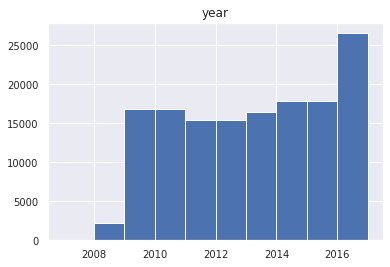

In [141]:
pd.DataFrame(Date.year).hist(xlabelsize=10, ylabelsize=10,figsize=(6,4))
_ = plt.title('year')

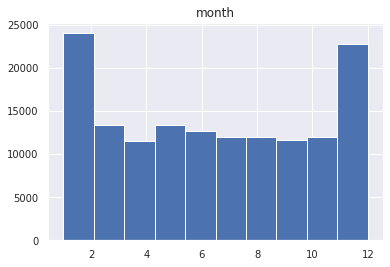

In [142]:
pd.DataFrame(Date.month).hist(xlabelsize=10, ylabelsize=10,figsize=(6,4))
_ = plt.title('month')

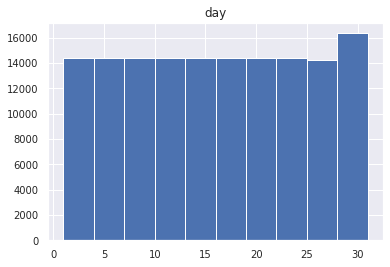

In [143]:
pd.DataFrame(Date.day).hist(xlabelsize=10, ylabelsize=10,figsize=(6,4))
_ = plt.title('day')

La fecha es una variable significativa respecto a las lluvias, para utilizarla como dato de entrada para nuestro modelo debemos convertirla a un valor unico que reprensente la temporada a la que hacemos referencia. Una opcion es convertir la fecha a un numero de 0 a 365, otra de las opciones es convertir la fecha a la estacion del año a la que pertene cada una o bien utilizar solo una parte de la fecha como dato. 

Utilizaremos solo el mes como dato significativo de la fecha, ya que es el que mas aporta informacion a la estacion o temporada

In [146]:
data = dataset.copy()
data['month'] = Date.month
data = data.drop(['Date'], axis=1)
data.head(2)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12


### Variable de Salida : Codificacion

Codificamos a valores binarios 0 y 1 la variable de salida ***RainTomorrow***. 

In [148]:
data['RainTomorrow'] = data['RainTomorrow'].replace({"No": 0, "Yes": 1})
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0,12


Hacemos el mismo procedimiento para la variable ***RainToday***

In [149]:
data['RainToday'] = data['RainToday'].replace({"No": 0, "Yes": 1})
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12


Antes de dividir el dataset en train y test , verificamos que la salida no tenga valores faltantes. En caso de tenerlos, eliminamos esas filas. 

In [165]:
status[['variable','q_nan','p_nan']][status['variable']=='RainTomorrow']

,variable,q_nan,p_nan
22,RainTomorrow,3267,0.02246


La variable de salida ***RainTomorrow*** contiene un 2% de valores faltantes. Eliminamos la fila entera de dichos valores.

In [166]:
data1 = data[data['RainTomorrow'].notna()]

In [168]:
print('Cantidad de filas eliminadas :', data.shape[0] - data1.shape[0])

Cantidad de filas eliminadas : 3267


In [173]:
fp.status(data1)[fp.status(data1)['variable']=='RainTomorrow']

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
21,RainTomorrow,0,0.0,110316,0.775819,2,float64


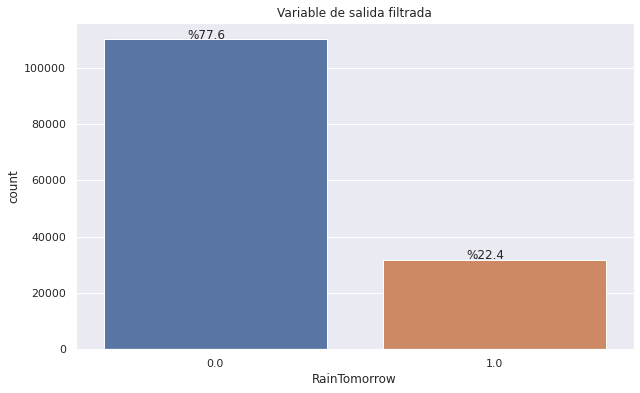

In [175]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= data1['RainTomorrow'], data=data1)
ax.set_title('Variable de salida filtrada')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format((p.get_bbox().get_points()[1,1]/data1.shape[0])*100), (p.get_x()+0.3, p.get_height()+50))
plt.show()

Luego de eliminar las filas que no contenian valores de salida, podemos observar que la distribucion de valores no se altero significativamente.  

#### Analisis de correlacion de variables

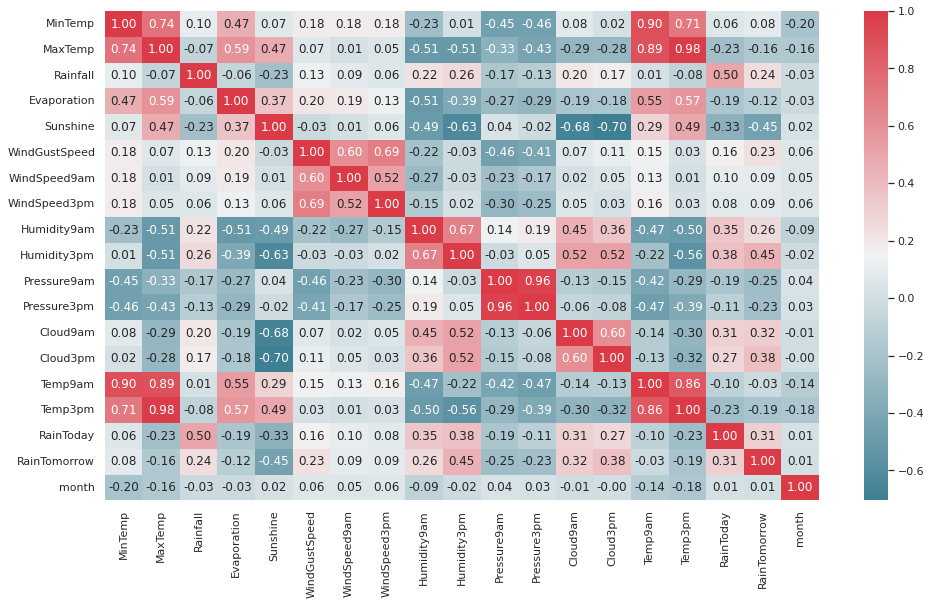

In [587]:
corr = data1.corr()
ax = plt.figure(figsize=(16,9)).add_subplot()
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f", ax=ax)
sns.set(font_scale=0.9)

Se observa que las variables de Humedad, cloud9am y cloud 3pm estan bastante correlacionadas con la variable de salida. La correlacion mas alta es la de la máxima temperatura "MaxTemp" y la temperatura a las 3pm "Temp3pm"

### 2. Esquema de validación de resultados

Partimos el dataset en train y test

In [611]:
from sklearn.model_selection import train_test_split

X = data1.drop('RainTomorrow',axis = 1, inplace = False)
y = data1['RainTomorrow']

In [612]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,12


In [613]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [614]:
#print('X_train :{} - X_test :{} '.format(X_train.shape, X_test.shape))
#print('y_train :{} - y_test :{} '.format(y_train.shape, y_test.shape))


Como el dataset aun contiene muchos valores NaN y es probable que se descarten filas, creo conveniente dejar la columna de resultados dentro de cada dataset (train y test) de manera tal que al borrar filas se borre tambien la salida asociada. 

In [615]:
data_train, data_test = train_test_split(data1, test_size = 0.20, random_state = 1)

In [616]:
print('data_train :{} - data_test :{} '.format(data_train.shape, data_test.shape))

data_train :(113754, 23) - data_test :(28439, 23) 


### 3. Limpieza y preparación de datos / ingeniería de features

In [617]:
d_NaN = fp.status(data_train)[['variable','q_nan','p_nan']]
d_NaN = d_NaN.sort_values(by=['q_nan'],  ascending=False)
d_NaN

,variable,q_nan,p_nan
5,Sunshine,54240,0.476818
4,Evaporation,48636,0.427554
17,Cloud3pm,45729,0.401999
16,Cloud9am,42975,0.377789
14,Pressure9am,11231,0.098731
15,Pressure3pm,11204,0.098493
8,WindDir9am,7954,0.069923
6,WindGustDir,7437,0.065378
7,WindGustSpeed,7389,0.064956
9,WindDir3pm,2976,0.026162


Se observa que 11 variables contienen menos de 3% de valores nulos. Una de las opciones para este caso es eliminar las filas correspondientes, ya que la perdida de datos no seria tan significativa.

El resto de las variables conviene analizarlas individualmente ya que sus valores NaN van desde el 6% hasta el 47% en el caso de Sunshine

Variables que contienen menos de 3% de valores NaN

In [618]:
d_NaN[d_NaN['p_nan'] < 0.03]

,variable,q_nan,p_nan
9,WindDir3pm,2976,0.026162
13,Humidity3pm,2893,0.025432
19,Temp3pm,2176,0.019129
11,WindSpeed3pm,2073,0.018224
12,Humidity9am,1442,0.012676
20,RainToday,1120,0.009846
3,Rainfall,1120,0.009846
10,WindSpeed9am,1070,0.009406
18,Temp9am,733,0.006444
1,MinTemp,503,0.004422


In [619]:
# Eliminamos las filas de variables que contienen menos de 3% de NaN
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']

data_train2 = data_train.dropna(subset = columns)
data_test2 = data_test.dropna(subset = columns)

In [620]:
print("% de reduccion del dataset de train: %{:.2f}".format(100*(data_train.shape[0] - data_train2.shape[0])/data_train.shape[0]))
print("% de reduccion del dataset de test: %{:.2f}".format(100*(data_test.shape[0] - data_test2.shape[0])/data_test.shape[0]))


% de reduccion del dataset de train: %5.32
% de reduccion del dataset de test: %5.44


In [621]:
d_NaN = fp.status(data_train2)[['variable','q_nan','p_nan']]
d_NaN = d_NaN.sort_values(by=['q_nan'],  ascending=False)
d_NaN

,variable,q_nan,p_nan
5,Sunshine,49498,0.459604
4,Evaporation,44863,0.416567
17,Cloud3pm,41316,0.383632
16,Cloud9am,40185,0.373130
14,Pressure9am,9022,0.083772
15,Pressure3pm,8976,0.083345
8,WindDir9am,6017,0.055870
6,WindGustDir,4836,0.044904
7,WindGustSpeed,4825,0.044802
0,Location,0,0.000000


Eliminamos los valores faltantes de aquellas variables que contenian pocos NaN. La reduccion del dataset fue de 5%

Analizamos ahora las variables categoricas relativas a la direccion del  viento ***WindDir9am, WindGustDir*** 

In [622]:
data_train2[['WindDir9am', 'WindGustDir']]

,WindDir9am,WindGustDir
81451,NaN,SW
16203,SE,NaN
110023,SE,NaN
126811,N,ENE
102780,WNW,NNW
...,...,...
75573,NNW,W
111893,SW,WSW
51345,ESE,N
5278,SW,SW


Las tres variables contienen las mismas clases. Se reemplaza los valores NaN con los valores que mas se repiten dentro de cada variable

In [623]:
data_train2['WindDir9am'].value_counts()

N      8750
E      7028
SSE    6990
SE     6982
S      6663
W      6399
NW     6364
SW     6322
NNE    6181
NNW    6035
ENE    5946
ESE    5749
SSW    5728
NE     5721
WNW    5530
WSW    5292
Name: WindDir9am, dtype: int64

In [624]:
data_train2['WindGustDir'].value_counts()

W      7562
SE     7240
S      7025
N      6978
SSE    6969
WSW    6938
SW     6909
E      6902
SSW    6658
NW     6238
WNW    6183
ENE    6100
ESE    5631
NE     5502
NNW    5052
NNE    4974
Name: WindGustDir, dtype: int64

In [625]:
# Reemplazamos los valores NaN de las variables categoricas respectivas a la direccion del viento
data_train2['WindDir9am'] = data_train2['WindDir9am'].replace(np.nan, data_train2['WindDir9am'].value_counts().index[0])
data_test2['WindDir9am'] = data_test2['WindDir9am'].replace(np.nan, data_test2['WindDir9am'].value_counts().index[0])

data_train2['WindGustDir'] = data_train2['WindGustDir'].replace(np.nan, data_train2['WindGustDir'].value_counts().index[0])
data_test2['WindGustDir'] = data_test2['WindGustDir'].replace(np.nan, data_test2['WindGustDir'].value_counts().index[0])

In [626]:
d_NaN = fp.status(data_train2)[['variable','q_nan','p_nan']]
d_NaN = d_NaN.sort_values(by=['q_nan'],  ascending=False)
d_NaN

,variable,q_nan,p_nan
5,Sunshine,49498,0.459604
4,Evaporation,44863,0.416567
17,Cloud3pm,41316,0.383632
16,Cloud9am,40185,0.373130
14,Pressure9am,9022,0.083772
15,Pressure3pm,8976,0.083345
7,WindGustSpeed,4825,0.044802
0,Location,0,0.000000
13,Humidity3pm,0,0.000000
21,RainTomorrow,0,0.000000


Codifico las variables categoricas ***Location , WindDir3am, WindDir9am, WindGustDir***

In [627]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
LocationEnc = LabelEncoder()

LocationEnc.fit(pd.concat([data_test2.Location, data_train2.Location]).astype(str))

data_train2.Location = LocationEnc.transform(data_train2.Location.astype(str))
data_test2.Location = LocationEnc.transform(data_test2.Location.astype(str))

In [628]:
#WindDirEn = OrdinalEncoder()
WindDirEnc = LabelEncoder()
WindDirEnc.fit(pd.concat([data_test2.WindGustDir, data_train2.WindGustDir]).astype(str))

data_train2.WindGustDir = WindDirEnc.transform(data_train2.WindGustDir.astype(str))
data_test2.WindGustDir = WindDirEnc.transform(data_test2.WindGustDir.astype(str))

In [629]:
data_train2.WindDir3pm = WindDirEnc.transform(data_train2.WindDir3pm.astype(str))
data_test2.WindDir3pm = WindDirEnc.transform(data_test2.WindDir3pm.astype(str))

In [630]:
data_train2.WindDir9am = WindDirEnc.transform(data_train2.WindDir9am.astype(str))
data_test2.WindDir9am = WindDirEnc.transform(data_test2.WindDir9am.astype(str))

Verificamos que los datos fueron reemplazados por sus respectivas categorias

In [631]:
data_train2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
81451,12,7.9,21.4,0.2,2.6,10.3,12,35.0,3,11,...,54.0,1024.6,1023.9,NaN,NaN,8.8,20.4,0.0,0.0,3
16203,24,18.4,20.2,32.4,NaN,NaN,13,NaN,9,9,...,94.0,NaN,NaN,8.0,8.0,19.0,18.5,1.0,1.0,2
110023,1,16.0,22.1,0.0,5.6,11.3,13,NaN,9,2,...,61.0,1017.5,1013.9,2.0,1.0,20.5,21.0,0.0,0.0,1
126811,36,5.1,19.7,0.0,NaN,NaN,1,26.0,3,4,...,48.0,NaN,NaN,NaN,NaN,11.1,19.3,0.0,0.0,6
102780,28,10.9,14.8,0.0,NaN,NaN,6,104.0,14,14,...,50.0,1006.2,1008.1,NaN,NaN,12.2,14.2,0.0,1.0,8


Quitamos la variable de salida de ambos conjunto de datos (train y test) 

In [632]:
y_train = data_train2['RainTomorrow'].reset_index(drop=True)
y_test = data_test2['RainTomorrow'].reset_index(drop=True)

data_train2 = data_train2.drop('RainTomorrow',axis = 1, inplace = False)
data_test2 = data_test2.drop('RainTomorrow',axis = 1, inplace = False)

In [633]:
data_train2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month
81451,12,7.9,21.4,0.2,2.6,10.3,12,35.0,3,11,...,99.0,54.0,1024.6,1023.9,NaN,NaN,8.8,20.4,0.0,3
16203,24,18.4,20.2,32.4,NaN,NaN,13,NaN,9,9,...,98.0,94.0,NaN,NaN,8.0,8.0,19.0,18.5,1.0,2
110023,1,16.0,22.1,0.0,5.6,11.3,13,NaN,9,2,...,56.0,61.0,1017.5,1013.9,2.0,1.0,20.5,21.0,0.0,1
126811,36,5.1,19.7,0.0,NaN,NaN,1,26.0,3,4,...,95.0,48.0,NaN,NaN,NaN,NaN,11.1,19.3,0.0,6
102780,28,10.9,14.8,0.0,NaN,NaN,6,104.0,14,14,...,70.0,50.0,1006.2,1008.1,NaN,NaN,12.2,14.2,0.0,8


In [634]:
y_train.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: RainTomorrow, dtype: float64

In [635]:
print('X_train :{} - X_test :{} '.format(data_train2.shape, data_test2.shape))
print('y_train :{} - y_test :{} '.format(y_train.shape, y_test.shape))

X_train :(107697, 22) - X_test :(26893, 22) 
y_train :(107697,) - y_test :(26893,) 


La estrategia para remplazar los valores numericos faltantes podria ser utilizando algun metodo de inputacion automatica , otra opcion seria reemplazar por la media o mediana. Para este caso, como tenemos valores extremos preferimos la mediana. 

In [636]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(data_train2)

In [637]:
data_train2 = pd.DataFrame(imputer.transform(data_train2))
data_test2 = pd.DataFrame(imputer.transform(data_test2))

In [638]:
data_train2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,12.0,7.9,21.4,0.2,2.6,10.3,12.0,35.0,3.0,11.0,...,99.0,54.0,1024.6,1023.9,5.0,5.0,8.8,20.4,0.0,3.0
1,24.0,18.4,20.2,32.4,4.8,8.5,13.0,39.0,9.0,9.0,...,98.0,94.0,1017.6,1015.3,8.0,8.0,19.0,18.5,1.0,2.0
2,1.0,16.0,22.1,0.0,5.6,11.3,13.0,39.0,9.0,2.0,...,56.0,61.0,1017.5,1013.9,2.0,1.0,20.5,21.0,0.0,1.0
3,36.0,5.1,19.7,0.0,4.8,8.5,1.0,26.0,3.0,4.0,...,95.0,48.0,1017.6,1015.3,5.0,5.0,11.1,19.3,0.0,6.0
4,28.0,10.9,14.8,0.0,4.8,8.5,6.0,104.0,14.0,14.0,...,70.0,50.0,1006.2,1008.1,5.0,5.0,12.2,14.2,0.0,8.0


In [639]:
fp.status(data_train2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,0,0,0.0,2416,0.022433,49,float64
1,1,0,0.0,125,0.001161,382,float64
2,2,0,0.0,9,0.000084,494,float64
3,3,0,0.0,69197,0.642516,616,float64
4,4,0,0.0,182,0.001690,330,float64
5,5,0,0.0,1765,0.016389,145,float64
6,6,0,0.0,6902,0.064087,16,float64
7,7,0,0.0,0,0.000000,67,float64
8,8,0,0.0,7028,0.065257,16,float64
9,9,0,0.0,6449,0.059881,16,float64


Escalado de variables

In [640]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_train2)

StandardScaler()

In [641]:
# Escalamos los datos
X_train = pd.DataFrame(scaler.transform(data_train2))
X_test = pd.DataFrame(scaler.transform(data_test2))

In [642]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.836368,-0.671793,-0.262430,-0.254456,-0.814853,0.804104,0.862187,-0.379303,-0.898531,0.703827,...,1.589649,0.131523,1.025591,1.287498,0.155281,0.146457,-1.263475,-0.193961,-0.533278,-0.990531
1,0.004294,0.975394,-0.432516,3.636536,-0.121301,0.161801,1.076035,-0.076440,0.426764,0.269073,...,1.537252,2.059681,-0.007481,0.004360,1.461755,1.542333,0.313525,-0.468795,1.875195,-1.281669
2,-1.606976,0.598894,-0.163213,-0.278624,0.130900,1.160938,1.076035,-0.076440,0.426764,-1.252567,...,-0.663414,0.468951,-0.022239,-0.204523,-1.151193,-1.714712,0.545436,-0.107171,-0.533278,-1.572806
3,0.844957,-1.111043,-0.503385,-0.278624,-0.121301,0.161801,-1.490142,-1.060746,-0.898531,-0.817813,...,1.380062,-0.157701,-0.007481,0.004360,0.155281,0.146457,-0.907877,-0.353075,-0.533278,-0.117118
4,0.284515,-0.201168,-1.197902,-0.278624,-0.121301,0.161801,-0.420901,4.845090,1.531178,1.355958,...,0.070141,-0.061293,-1.689913,-1.069895,0.155281,0.146457,-0.737808,-1.090790,-0.533278,0.465157


### 4. Entrenamiento de modelos

#### MODELO 1 : Random forest Classifier

In [643]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [644]:
rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_train, y_train )

RandomForestClassifier(random_state=1)

In [645]:
score = dict()
y_pred = rfc.predict(X_test)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)
score[f'RFC1'] = bal_accuracy*100
print('Balanced Accuracy score Random Forest : ',bal_accuracy*100)

Balanced Accuracy score Random Forest :  74.45081023679914


#### MODELO 2 : XGBoost

In [646]:
from xgboost import XGBClassifier

In [647]:
XGBC = XGBClassifier(use_label_encoder=False, n_estimators=1000, eval_metric='mlogloss')

XGBC.fit(X_train, y_train )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [648]:
y_pred2 = XGBC.predict(X_test)
bal_accuracy2 = balanced_accuracy_score(y_test, y_pred2)
score[f'XGB1'] = bal_accuracy2*100
print('Balanced Accuracy XGBoost : ',bal_accuracy2*100)

Balanced Accuracy XGBoost :  77.11729951991859


#### Probamos otra alternativa respecto a la ingenieria de features : Elimino todos los valores que contienen NaNs

In [649]:
data_train4 = data_train.dropna()
data_test4 = data_test.dropna()

In [650]:
print("% de reduccion del dataset de train: %{:.2f}".format(100*(data_train.shape[0] - data_train4.shape[0])/data_train.shape[0]))
print("% de reduccion del dataset de test: %{:.2f}".format(100*(data_test.shape[0] - data_test4.shape[0])/data_test.shape[0]))


% de reduccion del dataset de train: %60.33
% de reduccion del dataset de test: %60.27


In [651]:
LocationEnc = LabelEncoder()

LocationEnc.fit(pd.concat([data_test4.Location, data_train4.Location]).astype(str))

data_train4.Location = LocationEnc.transform(data_train4.Location.astype(str))
data_test4.Location = LocationEnc.transform(data_test4.Location.astype(str))

In [652]:
#WindDirEn = OrdinalEncoder()
WindDirEnc = LabelEncoder()
WindDirEnc.fit(pd.concat([data_test4.WindGustDir, data_train4.WindGustDir]).astype(str))

data_train4.WindGustDir = WindDirEnc.transform(data_train4.WindGustDir.astype(str))
data_test4.WindGustDir = WindDirEnc.transform(data_test4.WindGustDir.astype(str))

In [653]:
data_train4.WindDir3pm = WindDirEnc.transform(data_train4.WindDir3pm.astype(str))
data_test4.WindDir3pm = WindDirEnc.transform(data_test4.WindDir3pm.astype(str))

In [654]:
data_train4.WindDir9am = WindDirEnc.transform(data_train4.WindDir9am.astype(str))
data_test4.WindDir9am = WindDirEnc.transform(data_test4.WindDir9am.astype(str))

In [655]:
y_train2 = data_train4['RainTomorrow'].reset_index(drop=True)
y_test2 = data_test4['RainTomorrow'].reset_index(drop=True)

data_train4 = data_train4.drop('RainTomorrow',axis = 1, inplace = False)
data_test4 = data_test4.drop('RainTomorrow',axis = 1, inplace = False)

In [656]:
scaler = StandardScaler()

scaler.fit(data_train4)

StandardScaler()

In [657]:
# Escalamos los datos
X_train2 = pd.DataFrame(scaler.transform(data_train4))
X_test2 = pd.DataFrame(scaler.transform(data_test4))

In [658]:
X_train2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.872703,-0.380379,-0.760381,-0.304405,0.413426,-0.223955,-1.356396,-1.117789,1.262916,-1.395798,...,0.765324,0.665339,1.647094,1.385259,-0.083907,1.010461,-0.850325,-0.628560,-0.53223,-0.122127
1,0.323673,0.024991,0.245867,-0.304405,0.522690,1.215192,0.939987,-0.592153,-1.099072,0.938925,...,-0.751891,-0.623971,-0.441320,-0.539835,-1.514196,0.633232,-0.011953,0.295074,-0.53223,1.328462
2,0.049158,1.007235,0.231492,-0.304405,0.468058,1.295144,0.313701,-0.742335,-1.528524,0.302183,...,-0.372587,0.714927,-1.006932,-0.904436,-1.156624,-0.498454,0.917877,0.339057,-0.53223,-1.282598
3,-0.362614,-0.442744,0.633990,-0.304405,1.014379,1.561653,-1.147634,-0.817426,-1.528524,0.938925,...,-1.456312,-1.566160,0.283823,0.174783,-1.514196,-1.252912,-0.179628,0.646935,-0.53223,-1.572716
4,-0.362614,-1.487352,-1.565378,-0.304405,-0.843111,-1.449895,-0.103824,-1.568335,-0.454893,1.363420,...,0.223462,0.714927,-0.238280,-0.087730,1.346382,0.633232,-1.703940,-1.420247,-0.53223,0.167991


### Modelo 3: Random Forest Classifier

In [659]:
rfc2 = RandomForestClassifier( random_state=1)

rfc2.fit(X_train2, y_train2 )

RandomForestClassifier(random_state=1)

In [660]:
y_pred3 = rfc2.predict(X_test2)
bal_accuracy3 = balanced_accuracy_score(y_test2, y_pred3)
score[f'RFC2'] = bal_accuracy3*100
print('Balanced Accuracy score Random Forest : ',bal_accuracy3*100)

Balanced Accuracy score Random Forest :  75.03187207253522


#### MODELO 4 : XGBoost

In [661]:
XGBC2 = XGBClassifier(use_label_encoder=False, n_estimators=1000, eval_metric='mlogloss')

XGBC2.fit(X_train2, y_train2 )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [662]:
y_pred4 = XGBC2.predict(X_test2)
bal_accuracy4 = balanced_accuracy_score(y_test2, y_pred4)
score[f'XGB2'] = bal_accuracy4*100
print('Balanced Accuracy XGBoost : ',bal_accuracy4*100)

Balanced Accuracy XGBoost :  77.82959857606781


Se puede observar que eliminando todas las variables faltantes se logra una mejora minima en los resultados. 

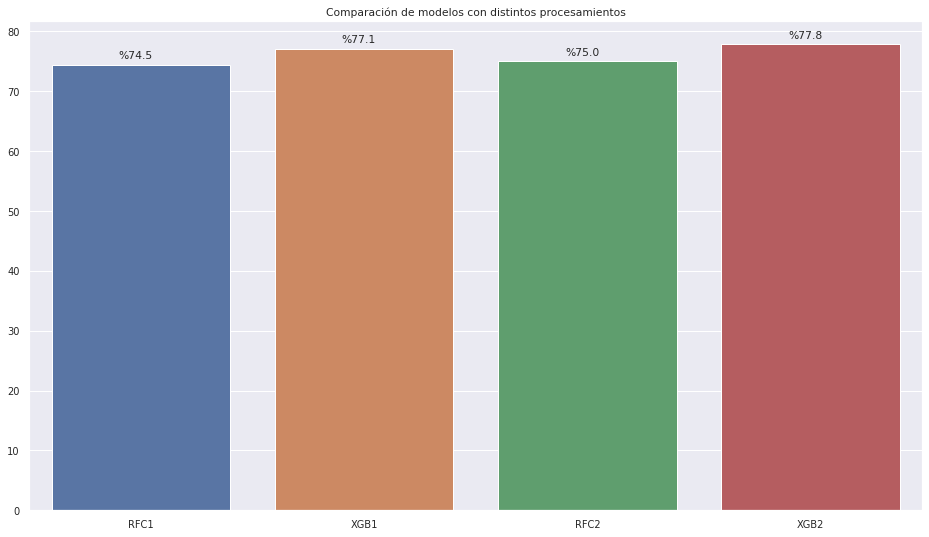

In [663]:
ax = plt.figure(figsize=(16,9)).add_subplot()
ax.set_title('Comparación de modelos con distintos procesamientos')
sns.barplot(x=list(score.keys()), y=list(score.values()), ax=ax)
for p in ax.patches:
    ax.annotate('%{:.1f}'.format((p.get_bbox().get_points()[1,1])), (p.get_x()+0.3, p.get_height()+1))
plt.show()

### Conclusiones:
- Reemplazar los datos faltantes por valores estadísticos no han generado una mejora de los resultados.
- Eliminar todos los valores faltantes ha generado una minima mejora respecto a la imputacion con valores estadisticos  
- Solo algunas de las columnas con datos faltantes tenia alta correlacion con la salida por lo que quizas mejoran do la forma en que se completan dichos datos en tales columnas podria generar alguna mejora.
